# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [ ]:
#
#
#
#
# Your code to develop AI model for malware classification.
# Hint: Use the example code provided in previous lab.
#
#
#
#


In [1]:
from google.colab import files
!pip install -q kaggle


In [2]:
# Upload API key. Kaggle API key. It's on Kaggle. Tinker with it choom, you'll figure it out.
files.upload()

# Setup Kaggle credentials
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Grab the dataset
#!/bin/bash
!kaggle datasets download shashwatwork/android-malware-dataset-for-machine-learning
# Unzip and clean up
!unzip android-malware-dataset-for-machine-learning.zip
!rm android-malware-dataset-for-machine-learning.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning
License(s): Attribution 4.0 International (CC BY 4.0)
Archive:  android-malware-dataset-for-machine-learning.zip
  inflating: dataset-features-categories.csv  
  inflating: drebin-215-dataset-5560malware-9476-benign.csv  


In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Load the dataset
df = pd.read_csv('/content/drebin-215-dataset-5560malware-9476-benign.csv')

# Display the first few rows of the dataset
df.head()


<ipython-input-3-f7954aaf4452>:7: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drebin-215-dataset-5560malware-9476-benign.csv')


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [4]:
# Remove missing values & duplicates
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)

# Shuffle the deck to keep training random
df = shuffle(df)

# Check if we cleaned everything
df.isna().sum()

,0
transact,0
onServiceConnected,0
bindService,0
attachInterface,0
ServiceConnection,0
...,...
ACCESS_FINE_LOCATION,0
SET_WALLPAPER_HINTS,0
SET_PREFERRED_APPLICATIONS,0
WRITE_SECURE_SETTINGS,0


In [5]:
all_columns = df.columns.tolist()

# Identify categorical columns (exclude numerical columns)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_cols)

<ipython-input-8-81a766465f34>:15: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')


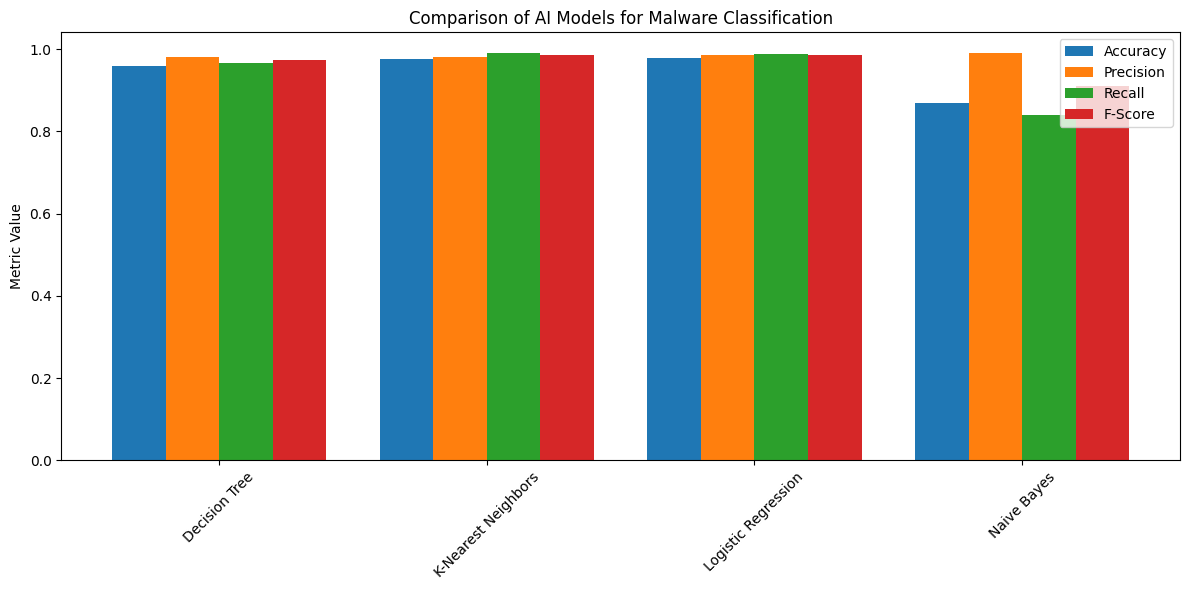

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'drebin-215-dataset-5560malware-9476-benign.csv' with the actual file path if different
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')
# If dataset is in a subfolder, include the path e.g., 'data/drebin-215-dataset-5560malware-9476-benign.csv'

# Data Preprocessing
df.dropna(axis=0, how='any', inplace=True)  # Remove rows with missing values
df.drop_duplicates(subset=None, keep="first", inplace=True)  # Remove duplicates
df = shuffle(df)  # Shuffle the dataset

# Categorical feature encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Assuming 'class' is a categorical column and gets one-hot encoded
# Check if 'class' is in categorical_cols
if 'class' in categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_', drop_first=False)  # Perform one-hot encoding, add prefixes
    # Get the new column name for 'class'
    # Assuming the column name after one-hot encoding is 'class_B' and/or 'class_S'
    class_columns = [col for col in df.columns if col.startswith('class_')]
    # Use the first class column as the target variable
    y = df[class_columns[0]]  # or y = df[['class_B', 'class_S']] if both columns are needed
    X = df.drop(columns=class_columns, axis=1) # drop one or both encoded class columns.
else:
    # If 'class' is not categorical or not in the dataset after cleaning:
    print(f"'class' column not found or not categorical. Available columns: {df.columns.tolist()}")
    # Handle the case where 'class' is not present or not categorical
    # ... (e.g., raise an error, try a different column, etc.)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store metrics for all models
metrics_dict = {}

# Train and evaluate models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Naive Bayes': GaussianNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_dict[model_name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]

# Plotting the performance comparison
categories = ['Accuracy', 'Precision', 'Recall', 'F-Score']
x = range(len(models))
fig, ax = plt.subplots(figsize=(12, 6))

for i, category in enumerate(categories):
    # Fix: Use correct index for metrics (0 for Accuracy, 1 for Precision, 2 for Recall, 3 for F-Score)
    ax.bar(x=[p + (i * 0.2) for p in x], height=[metrics[i] for metrics in metrics_dict.values()], width=0.2, label=category)

ax.set_xticks([p + 0.3 for p in x])
ax.set_xticklabels(metrics_dict.keys(), rotation=45)
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of AI Models for Malware Classification")
ax.legend(categories)
plt.tight_layout()
plt.show()

**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.